# Exploratory Data Analysis & Seaborn

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson4/EDAinSeaborn.ipynb)

In [2]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Подготовка данных

In [ ]:
# Colab Version
# !pip install wget
# !mkdir data
# !wget -P data/ https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/data/Snacks_Data.csv
# !wget -P data/ https://raw.githubusercontent.com/da-python/python-for-data-analytics/main/Lesson4/data/winequality.csv

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

snacks_sales = pd.read_csv(os.path.join('data','Snacks_Data.csv'))
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)

snacks_sales.shape


(1095, 12)

In [ ]:
snacks_sales.tail()

In [ ]:
snacks_sales.info()

In [ ]:
snacks_sales['date_new'] = pd.to_datetime(snacks_sales.Date)

## Relational Plots, sns.relplot()
- lineplot(), kind='line'
- scatterplot(), kind='scatter' default option

### lineplot()

#### Линейная диаграмма  один к одному для сравниваемых показателей

In [ ]:
# snacks_sales.query("Period < 1000 and daywk == 'Tuesday' ")

In [ ]:
sns.set(style='darkgrid')  

sns.relplot(
    x='date_new', 
    y='Smoothies', 
    data=snacks_sales.query("Period < 1000"), 
    kind='line',
    aspect=3
)
plt.title('Линейная диаграмма', size=20, color='g');

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(
    x='Period', 
    y='Smoothies', 
    hue='daywk', 
    hue_order=day_order,
    data=snacks_sales.query("Period < 300"), kind='line')
plt.title('Линейная диаграмма с параметром hue=daywk', size=20, color='g');

In [ ]:
sns.relplot(x='Period',
            y='Smoothies',
            hue='Promotion',
            hue_order=["Yes", "No"],
            data=snacks_sales.query("Period < 300"),
            aspect=2,
            height=7,
            kind='line')
plt.title('Линейная диаграмма c параметром hue=Promotion', size=20, color='g');

In [ ]:
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    hue_order=["Yes", "No"],
    style='weekend',
    style_order=["Y", "N"],
    kind='line', 
    data=snacks_sales.query("Period < 300"),
    aspect=3)
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

plt.show();

#### Линейные диаграммы с отношением один ко многим

In [ ]:
sns.relplot(
    x='Month', 
    y='Smoothies', 
    data=snacks_sales, 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

In [ ]:
sns.relplot(
    x='Month', 
    y='Smoothies', 
    hue='Promotion', 
    data=snacks_sales, 
    kind='line',
    err_style="bars",
    ci=9)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');


In [ ]:
sns.relplot(
    x='Month',
    y='Smoothies',
    hue='Promotion',
    style='weekend', 
    kind='line', 
    ci='sd', 
    data=snacks_sales)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');
plt.legend();

In [ ]:
sns.relplot(
    x='Month',
    y='Smoothies', 
    hue='Promotion', 
    style='weekend', 
    dashes=True,
    markers=True,
    data=snacks_sales, 
    kind='line', 
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

### Создание длинного датафрейма из датафрейма широкой формы

* В широкой форме для каждого продукта есть отдельная колонка
* В длинной форме все продукты схлопываются в одну, за счет этого таблица становится менее широкй и более длинной

In [ ]:
long_sales = pd.melt(snacks_sales, var_name='Item', value_name='Sales',
            id_vars=['daywk', 'weekend', 'Date', 'Promotion', 'Period', 'Month', 'Quarter','date_new'])
long_sales.shape         
long_sales.sample(n=5)   

In [ ]:
snacks_sales

#### Линейные диаграммы из датафрейма длинной формы

In [ ]:
g = sns.relplot(
    x='Period', 
    y='Sales', 
    data=long_sales, 
    kind='line', 
    hue='Item', 
    row='weekend', 
    col='Promotion')

In [ ]:
# одна линия для каждого продукта
long_sales['Day'] = pd.DatetimeIndex(long_sales['Date']).day
sns.relplot(
            x='Day',
            y='Sales',  
            hue='Promotion', 
            data=long_sales.query("weekend =='Y'"), 
            kind='line',
            units="Item", 
            estimator=None, 
            lw=1, 
            height=6, 
            aspect=2);

In [ ]:
### Scatterplot()
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

sns.relplot(
    x='Month',
    y='Smoothies',
    data=snacks_sales,
#     kind='scatter'
#     kind='line'
)
plt.title('Диаграмма рассеяния', size=20, color='g');

In [ ]:
sns.relplot(
    x='Period', 
    y='Smoothies', 
    hue='Promotion', 
    data=snacks_sales)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

In [ ]:
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    style='weekend', 
    markers=['^', 'D'],
    data=snacks_sales)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

In [ ]:
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    style='weekend',
    size='Cookies',
    markers=['^', 'D'],
    data=snacks_sales
)

plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

#### Диаграмма рассеяния с параметром Hue и дополнительными переменными

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.relplot(
    x='Period',
    y='Smoothies',
    hue='Promotion',
    col='daywk',
    col_wrap=4,
    col_order=day_order,
    data=snacks_sales,
    height=3
);

In [ ]:
# snacks_sales.head()

In [ ]:
sns.relplot(
    x='Period',
    y='Smoothies',
    col='daywk',
    col_order=day_order,
    row='Promotion',
    row_order=['Yes', 'No'],
    data=snacks_sales,
    height=3);


## Категорийные диаграммы, sns.catplot()
- stripplot() and swarmplot()
- boxplot() and boxnplot()
- barplot() and countplot()
- violinplot()
- pointplot()


* stripplot(), kind='strip' 
* swarmplot(), kind='swarm'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks", color_codes=True)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='daywk',
    y='Cookies', 
    data=snacks_sales, 
    hue='Promotion',    # оба на одном графике разными цветами
    order=day_order, 
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

In [ ]:
sns.catplot(
    x='daywk',
    y='Cookies', 
    data=snacks_sales.query("daywk != 'Thursday'"), 
    order=['Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday', 'Sunday'],
    palette='Set3',
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=2); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

In [ ]:
sns.catplot(
    x='daywk',
    y='Cookies', 
    data=snacks_sales, 
    order=day_order, 
    hue='Promotion',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

### boxplot(), kind='box'
### boxnplot(), kind='boxn'

In [ ]:
sns.set(style='darkgrid')
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    height=4, 
    aspect=2
); 

In [ ]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='Promotion',
    height=4, 
    aspect=2); 

In [ ]:
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='weekend', 
    order=day_order, 
    height=4, 
    aspect=2); 

In [ ]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='boxen', 
    height=4, 
    aspect=2); 

In [ ]:
sns.catplot(
    x='Item',
    y='Sales',
    data=long_sales,
    kind='boxen',
    hue='Promotion',
    height=4, 
    aspect=2);

In [ ]:
sns.catplot(
    x='Sales', 
    y='daywk', 
    data=long_sales, 
    kind='boxen', 
    hue='weekend',
    order=day_order, 
    height=4, 
    aspect=2); 

### barplot(), kind='bar'
### countplot(), kind='count'

In [ ]:
# possible options for estimator: numpy: median, sum, python: sum, len(for count) includes NaN
# pandas: pandas.Series.count, pandas.Series.sum ignore NaN
# in this data set mean and median are very close, and count is same for all the items so 
# these options don't reveal any thing significant 

from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log', ylim=[50000, 1000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=15, color='g', 
          weight='bold');

In [ ]:
sns.catplot(
    data=snacks_sales, 
    kind='bar', 
    height=4, 
    aspect=2,   
    order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period'],
    palette="Set1"
); 
plt.title('2. Столбиковая диаграмма: Широкий формат таблицы с предопределенной палитрой цветов', size=15, color='g', 
          weight='bold');

In [ ]:

sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='bar', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette={"Yes": "r", "No": "indigo"},
    estimator=median, 
    capsize=0.2, 
    height=4, 
    aspect=2); 

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='bar', 
    hue='Promotion', 
    ci='sd',
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1,
    hue_order=['Yes','No'], 
    palette="muted", 
    order=day_order, 
    height=4, 
    aspect=2);
plt.title('4. Столбиковая диаграмма, (estimator=len(count), errwidth=5, errcolor=m)',
          size=15, 
          color='g', 
          weight='bold'
         );

In [ ]:
# Count Plot показывает количество наблюдений

sns.catplot(x='Item', 
            data=long_sales, 
            kind='count', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('5. Count Plot - Продажи по продуктам', size=15, color='g', weight='bold');

In [ ]:
sns.catplot(
    x='Item', 
    data=long_sales, 
    kind='count', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette={"Yes": "r", "No": "indigo"}, 
    height=4, 
    aspect=2); 
plt.title('6. Count Plot, hue=Promotion, custom palette', size=15, color='g', weight='bold');

In [ ]:
sns.catplot(
    x='daywk', 
    data=long_sales, 
    kind='count', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette="Set2", 
    order=day_order, 
    height=4, 
    aspect=2);
plt.title('7. Count Plot: Продажи по дням недели', size=15, color='g', weight='bold');

### violinplot(), kind='violin'

In [ ]:
sns.catplot(
    x='Sales',
    y='Item',
    data=long_sales,
    kind='violin',
    height=6,
    aspect=2)
plt.title('1. Горизонтальная диаграмма - виолончели', size=15, color='g', weight='bold');

In [ ]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='violin', 
    hue='Promotion', 
    hue_order=["Yes", "No"], 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('2. Вертикальные виолончели с параметрами hue=Promotion, split=True', size=15, color='g', weight='bold');

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='violin', 
    order=day_order, 
    hue='Promotion', 
    hue_order=["Yes", "No"], 
    split=True, 
    inner="stick", 
    palette="pastel",
    height=4, 
    aspect=2)
plt.title('3. Виолончели с параметрами hue=Promotion, split=True, inner=stick', size=15, color='g', weight='bold');

### pointplot(), kind='point'

In [ ]:
sns.catplot(
    data=snacks_sales, 
    kind='point', 
    ci=99, 
    capsize=0.25, 
    height=4,        # wide form df
    aspect=2, 
    order=['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee', 'Period']
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold');

In [ ]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, # long form data frame
    kind='point', 
    markers='D', 
    ci='sd',
    height=4, 
    aspect=2)  
plt.title('2.  Точечная диаграмма с алмазным маркером и SD в доверительном интервале', size=15, color='g', weight='bold');

In [ ]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='point', 
    hue='Promotion', 
    hue_order=['Yes','No'], 
    palette={"Yes": "r", "No": "indigo"},
    markers=["^", "o"], 
    linestyles=["-", "--"], 
    ci=None, 
    col='daywk', 
    col_wrap=2,
    height=4, 
    aspect=2, 
    scale=1.5)
plt.suptitle("3. Точечная диаграмма с параметрами hue=Promotion, col='daywk'", size=30, color='g', weight='bold')
plt.tight_layout(pad=5,w_pad=0.25, h_pad=0.25);

In [ ]:
sns.catplot(
    x='daywk', 
    y='Sales', 
    data=long_sales, 
    kind='point', 
    hue='Promotion',
    dodge=False,
    hue_order=['Yes','No'], 
    palette="Set2", 
    order=day_order, 
    height=4, 
    aspect=2)
plt.title('4. Точечная диаграмма с продажами по дням и наложением', size=15, color='g', weight='bold');

## Диаграммы распределения
- distplot()
- rugplot()
- kdeplot()

### distplot() and rugplot()

In [ ]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    snacks_sales.Coffee,
    color='g', 
    rug=False, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения продаж кофе с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

In [ ]:
sns.distplot(
    snacks_sales.Cookies,
    vertical=False,                #hist=False
#     hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
#     kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"}
)           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

### distplot() and rugplot()

/Users/lev4/Projects/reboot/rebootDA2022_2/da_python/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


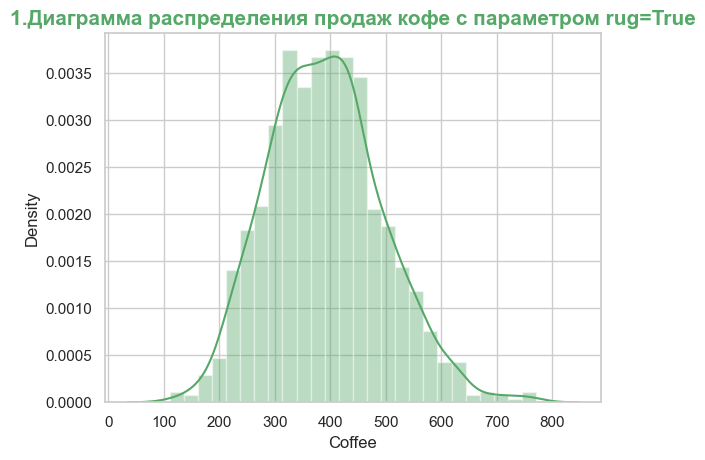

In [74]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    snacks_sales.Coffee,
    color='g', 
    rug=False, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения продаж кофе с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

/Users/lev4/Projects/reboot/rebootDA2022_2/da_python/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


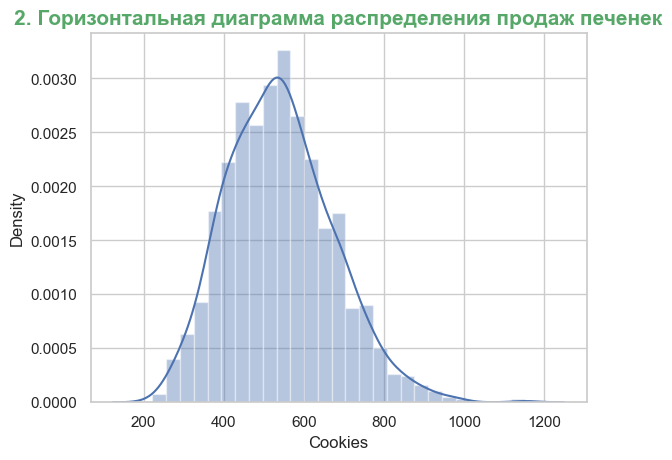

In [80]:
sns.distplot(
    snacks_sales.Cookies,
    vertical=False,                #hist=False
#     hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
#     kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"}
)           
plt.title('2. Горизонтальная диаграмма распределения продаж печенек', size=15, color='g', weight='bold')             
plt.show();

### pairplot() 

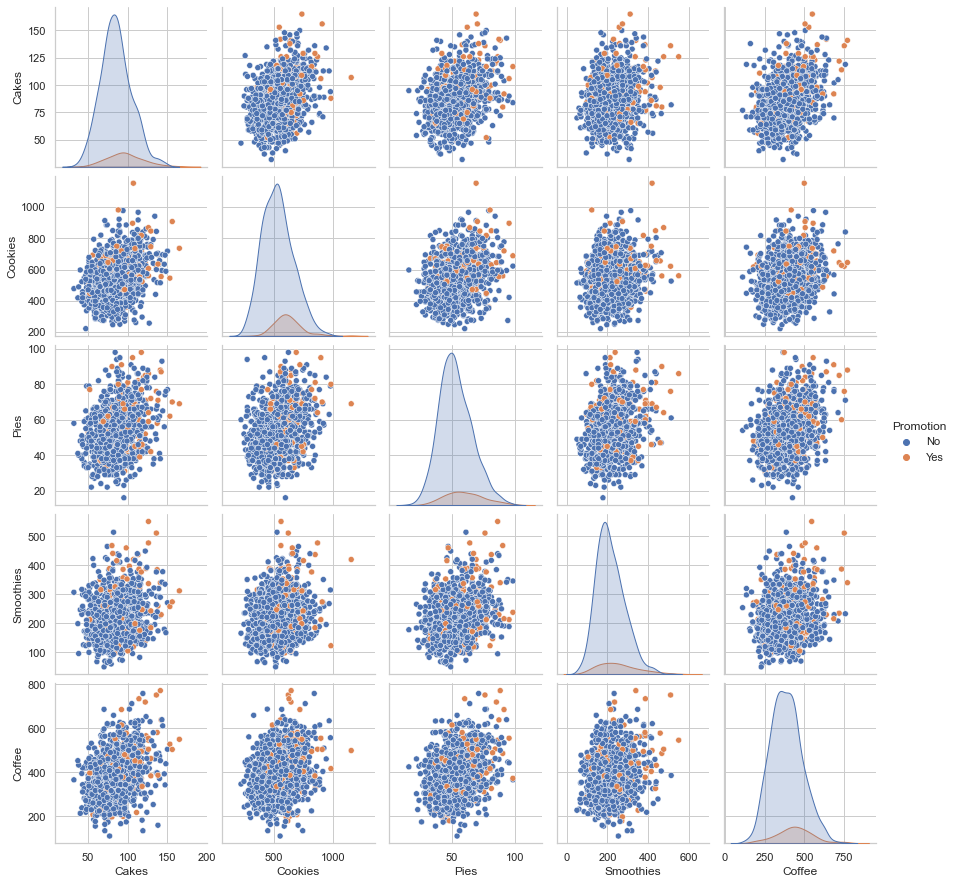

In [92]:
snacks_sales_items = snacks_sales.loc[:,['Cakes', 'Cookies', 'Pies', 'Smoothies','Coffee','Promotion']]
sns.pairplot(
    snacks_sales_items,
    hue='Promotion',
#     kind='reg'
)
plt.show();

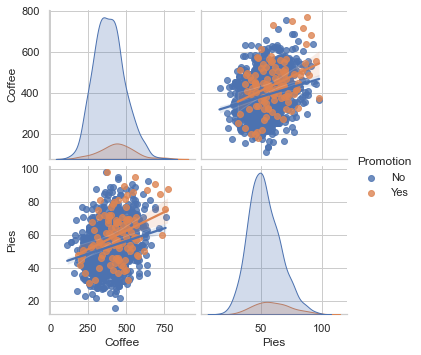

In [226]:
sns.pairplot(
    snacks_sales_items,
    vars=['Coffee', 'Pies'],
    hue='Promotion', kind='reg')
plt.show();

In [238]:
# snacks_sales_items[snacks_sales_items.Coffee > 0]

### PairGrid()

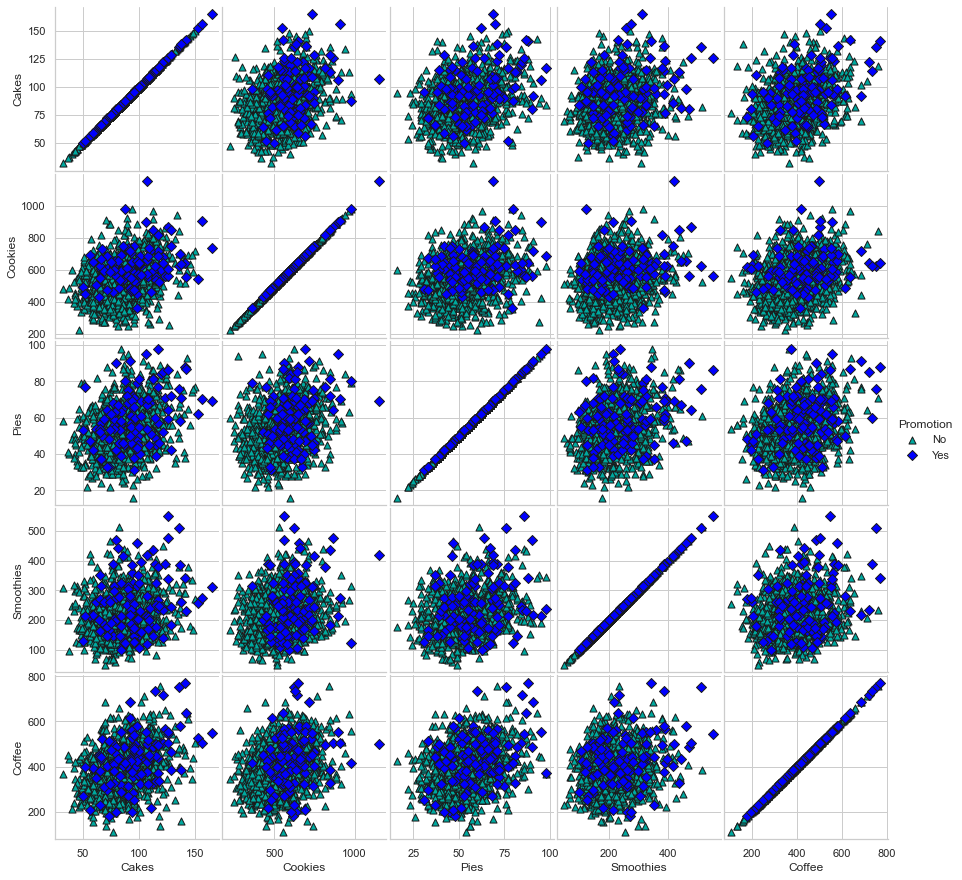

In [94]:
g = sns.PairGrid(
    snacks_sales_items, 
    hue='Promotion', 
    hue_kws={"marker": ["^", "D"]}, 
    palette={'Yes': 'blue', 'No': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);

## Матричные диаграммы
- heatmap()
- clustermap()

### Heatmap

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# Подготовим данные в сводной таблицы по кварталам в строчку и по продуктам в колонках
sales = pd.DataFrame(long_sales.groupby(["Item", "Quarter"]).Sales.mean())
sales = sales.reset_index()
sales = sales.pivot('Quarter','Item', 'Sales')
sales.head()

Item,Cakes,Coffee,Cookies,Pies,Smoothies
Quarter,,,,,
1,83.937037,395.814815,532.296296,52.996296,176.211111
2,86.890110,380.527473,527.117216,52.897436,243.300366
3,86.322464,394.492754,545.315217,53.344203,264.909420
4,87.927536,395.641304,556.753623,54.934783,188.797101


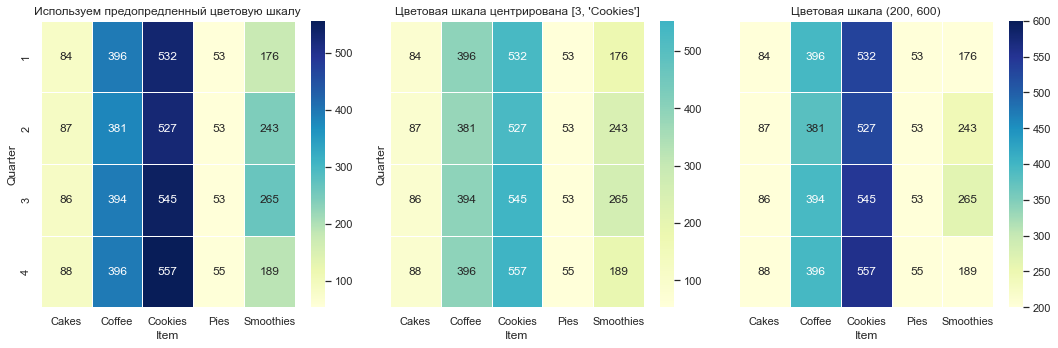

In [97]:
# Set up axes on which to plot various plots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    cmap="YlGnBu", 
    ax=ax1)
ax1.set_title('Используем предопредленный цветовую шкалу')

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True,
    cmap="YlGnBu", 
    center=sales.loc[3, 'Cookies'], 
    yticklabels=False, 
    ax=ax2)

ax2.set_title("Цветовая шкала центрирована [3, 'Cookies']")

sns.heatmap(
    sales, 
    annot=True, 
    fmt='.0f',
    linewidths=.5, 
    robust=True, 
    vmin=200, 
    vmax=600,
    cmap="YlGnBu", 
    yticklabels=False, 
    ax=ax3)
ax3.set(title='Цветовая шкала (200, 600)', ylabel='')

plt.tight_layout()
plt.show();

### Представляем другой датасет про винишко

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:

wine_quality = pd.read_csv(os.path.join('data','winequality.csv'), delimiter=';')

In [4]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:

quality_map = {3:'Low', 4: 'Low', 5:'Med', 6:'Med', 7:'High', 8:'High'}

wine_quality['Quality'] = wine_quality['quality'].map(quality_map)

In [ ]:
wine_quality['quality'].map(quality_map)

In [ ]:

corr = wine_quality.corr()
wine_quality.head()
set(wine_quality.quality)
corr

In [ ]:

corr = wine_quality.corr()
wine_quality.head()
set(wine_quality.quality)
corr

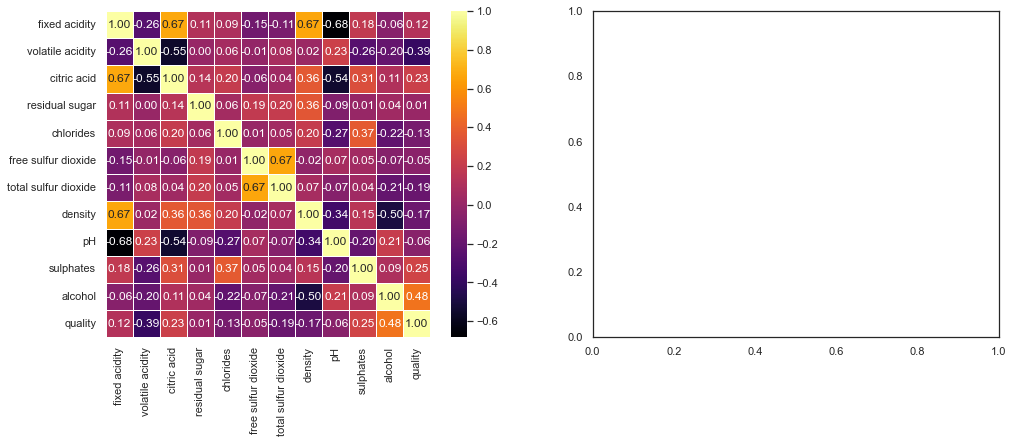

In [104]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize=(16,6)) 

sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno", ax=ax1);

In [105]:
mask = np.zeros_like(corr)

In [124]:
np.triu_indices_from(mask)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
         8,  8,  8,  8,  9,  9,  9, 10, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  1,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  3,
         4,  5,  6,  7,  8,  9, 10, 11,  4,  5,  6,  7,  8,  9, 10, 11,  5,
         6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11,  7,  8,  9, 10, 11,
         8,  9, 10, 11,  9, 10, 11, 10, 11, 11]))

In [107]:
mask[np.triu_indices_from(mask)] = True


In [108]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

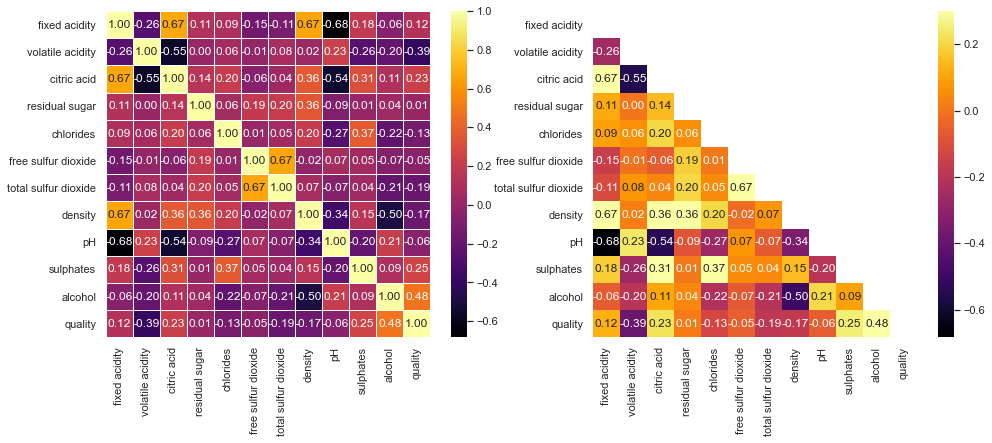

In [118]:
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, vmax=.3, annot=True, fmt='.2f', cmap="inferno", ax=ax2)
plt.show();

### Clustermaps

In [244]:
row_colors = wine_quality["Quality"].map(dict(zip(wine_quality["Quality"].unique(), "rbg")))

/Users/lev4/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


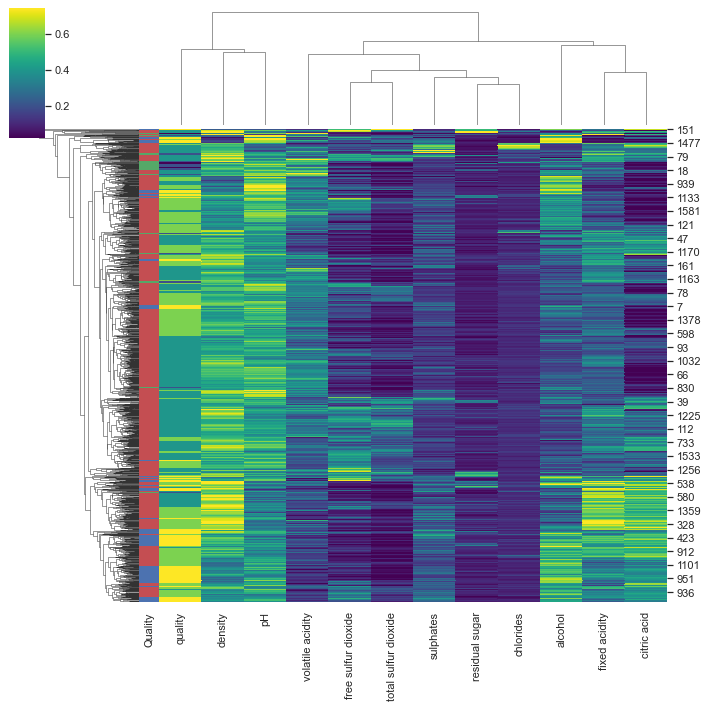

In [245]:
g = sns.clustermap(
    wine_quality.drop('Quality',axis=1), 
    standard_scale=1, 
    robust=True,
    row_colors=row_colors, 
    cmap='viridis')

array(['r', 'b', 'g'], dtype=object)

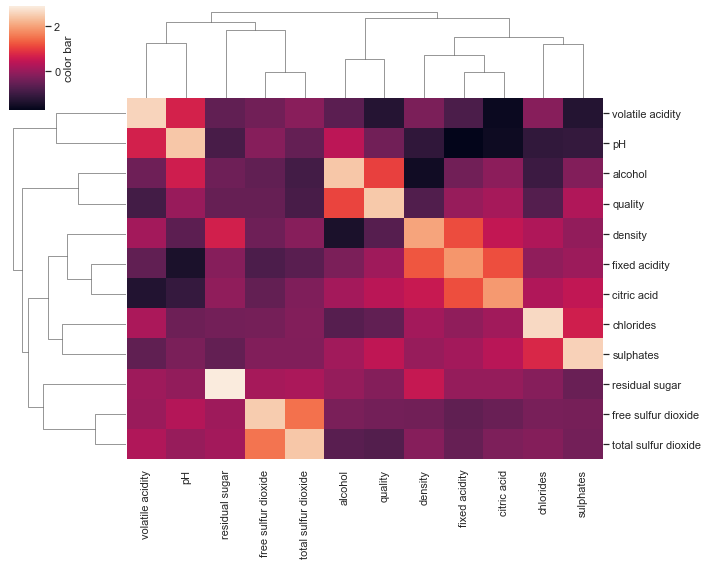

In [183]:
#row_index = g.dendrogram_row.reordered_ind
#col_index = g.dendrogram_col.reordered_ind

g = sns.clustermap(
    corr, 
    figsize=(10,8),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
)